# 7.2

x: (3, 40)
y: (1, 40)
w: (4, 3)
Miss Classification: 9


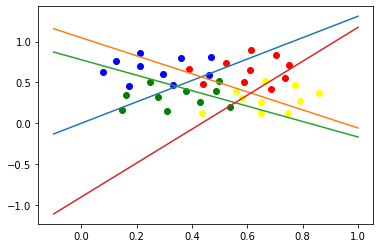

In [2]:
%run 7.2.py

In [ ]:
# %load 7.2.py
import numpy as np
import matplotlib.pyplot as plt
# load in dataset
csvname = '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',');

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]

row=np.ones([1,x.shape[1]])
x=np.mat(np.r_[row,x])
print('x:',np.shape(x))
print('y:',np.shape(y))
c=4
w=np.ones([c,x.shape[0]])
print('w:',np.shape(w))

iterations=np.mat([[1500,2000,2000,2000]])

alpha=np.mat([[0.05,0.05,0.01,0.01]])
#ite=np.zeros(iterations)
#p_cost=np.zeros(iterations)

def model(x,w):
    a=np.matmul(w,x)
    return a

def PerceptronCostFunction(w,temp_y):
    cost = 0
    for i in range(np.size(temp_y)):
        temp=-temp_y[0,i]*np.dot(w,x[:,i])
        if (temp>0):
            cost=cost+temp
        else:
            cost=cost
    return cost / float(np.size(temp_y))

def GradientOfPerceptron(w,temp_y):
    vector=np.zeros([x.shape[0],1])



    for i in range(np.size(temp_y)):
        temp = -temp_y[0, i] * np.dot(w, x[:, i])

        if(temp>0):
            vector=vector+(-temp_y[0,i])*x[:,i]
        else:
            vector=vector
    return vector/float(np.size(temp_y))

def PerceptronIte(w,temp_y,iterations,alpha):
    for i in range(iterations):
        #ite[i] = i
        grad = GradientOfPerceptron(w,temp_y)
        #p_cost[i] = PerceptronCostFunction(w,temp_y)
        w = w - alpha * grad.T
    #figure1 = plt.plot(ite, p_cost)
    #plt.show(figure1)
    return w

def fusion_rule(x,w):
    return np.argmax(model(x,w),axis=0)

def drawpoint(x, y):
    position = x[[1,2]]
    zeroXList = []
    zeroYList = []
    oneXList = []
    oneYList = []
    twoXList = []
    twoYList = []
    threeXList = []
    threeYList = []
    for i in range(x.shape[1]):
        if (int(y[0,i]) == 0):
            zeroXList.append(x[1,i])
            zeroYList.append(x[2,i])
        elif (int(y[0,i]) == 1):
            oneXList.append(x[1,i])
            oneYList.append(x[2,i])
        elif (int(y[0,i]) == 2):
            twoXList.append(x[1,i])
            twoYList.append(x[2,i])
        elif (int(y[0,i]) == 3):
            threeXList.append(x[1,i])
            threeYList.append(x[2,i])

    plt.scatter(zeroXList, zeroYList, color = 'blue')
    plt.scatter(oneXList, oneYList, color = 'red')
    plt.scatter(twoXList, twoYList, color='green')
    plt.scatter(threeXList, threeYList, color='yellow')
    return plt

def drawline(w,i):
    a = -(w[i][1] / w[i][2])
    b = -(w[i][0] / w[i][2])

    foo = lambda x: a * x + b
    i = -0.1
    xList = []
    yList = []
    while (i < 1):
        xList.append(i)
        yList.append(foo(i))
        i += 0.1

    plt.plot(xList, yList)

y=y.astype(int)
missclassfication=0
for j in range(c):
    temp_y = np.zeros([1, np.size(y)])

    for i in range(np.size(y)):
        if y[0,i]!=j:
            temp_y[0,i]=-1
        else:
            temp_y[0,i]=1

    #print(temp_y)
    w[j,:]=PerceptronIte(w[j,:],temp_y,iterations[0,j],alpha[0,j])

    mag=np.dot(w[j,:],w[j,:].T)
    mag=np.sqrt(mag)
    w[j,:]=w[j,:]/mag

yPre=fusion_rule(x,w)

for i in range(np.size(yPre)):
    if yPre[0,i]!=y[0,i]:
        missclassfication+=1
#print(yPre)
print('Miss Classification:',missclassfication)



for i in range (w.shape[0]):
    drawline(w,i)
drawpoint(x,y)
plt.show()

# 7.3

(3, 30)
(1, 30)
Miss classsification: 0


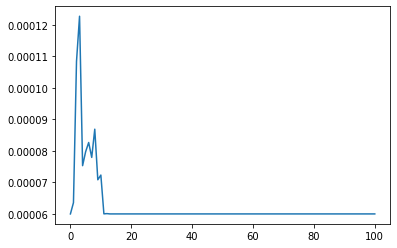

In [4]:
%run 7.3.py

In [ ]:
# %load 7.3.py
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import grad
# load in dataset
data = np.loadtxt('3class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]
row=np.ones([1,x.shape[1]])
x=np.r_[row,x]
print(np.shape(x))
print(np.shape(y))
c=3
lam=10**(-5)
w=np.ones([c,x.shape[0]])


input_weights=w

def model(x,w):
    a=np.matmul(w,x)
    return a

def multiclass_perceptron(w):
    #pre-compute predictions on all points
    all_evals=model(x,w)

    #compute maximum across data points
    a=np.max(all_evals,axis=0)

    #compute cost in compact form using numpy broadcast
    b=all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost=np.sum(a-b)

    #add regularizer
    cost=cost+lam*np.linalg.norm(w[:,1:],'fro')**2

    #return average
    return cost/float(np.size(y))

def g(input_weights):
    costfunc=0
    y_temp=np.mat(y.astype(int))
    for i in range(np.size(y)):
        yp=y_temp[0,i]
        costfunc=costfunc+np.max(np.matmul(input_weights,x[:,i]))-np.dot(input_weights[yp,:],x[:,i])+lam*np.linalg.norm(input_weights[:,1:])**2
    return costfunc/np.size(y)

def gradient_descent(g,alpha,max_its,w):

    #compute gradient module using autograd
    gradient=grad(g)

    #gradient discent loop
    weight_history=[w]

    cost_history=[g(w)]
    for k in range(max_its):

        #evaluate the gradient
        grad_eval=gradient(w)

        #take gradient descent step
        w=w-alpha*grad_eval

        #record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def fusion_rule(x,w):
    return np.argmax(model(x,w),axis=0)


g_flat, unclatten_func, w_flat=flatten_func(g, input_weights)
test=grad(g_flat)
ite=100
weight_history, cost_history =gradient_descent(g_flat,0.0001,ite,w_flat)
x_axis=np.arange(ite+1)

plt.plot(x_axis,cost_history)
#print(cost_history[0])
#print(cost_history[-1])
result_w=weight_history[-1]
result_w=result_w.reshape(3,3)
yPre=fusion_rule(x,result_w)
wrong=0

for i in range(np.size(yPre)):
    #print(yPre[i])
   # print(y[i])
    if yPre[i]!=y[0,i]:
        wrong=wrong+1
print('Miss classsification:',wrong)
plt.show()

# 7.4, 7,6, 7,8

In [21]:
from IPython.display import display, Image

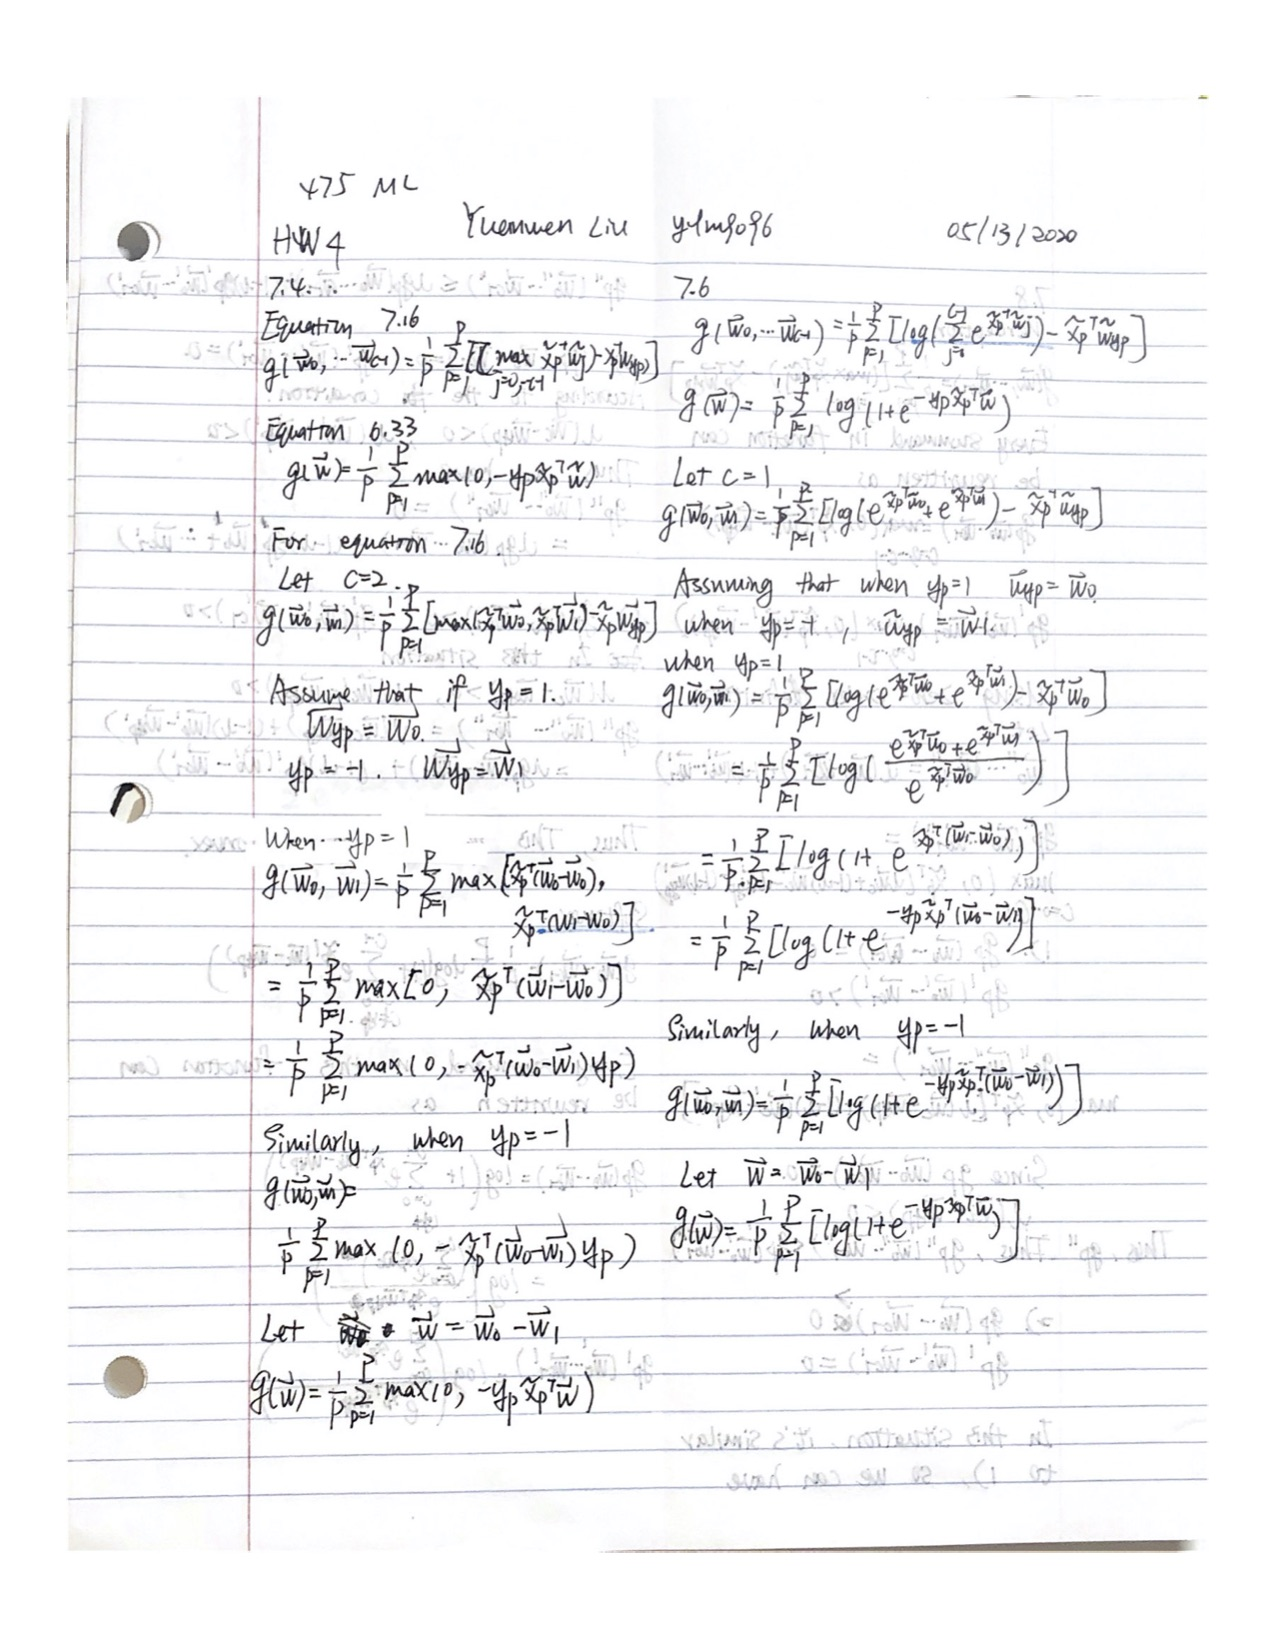

In [22]:
display( Image( filename =  '1.jpg' ))

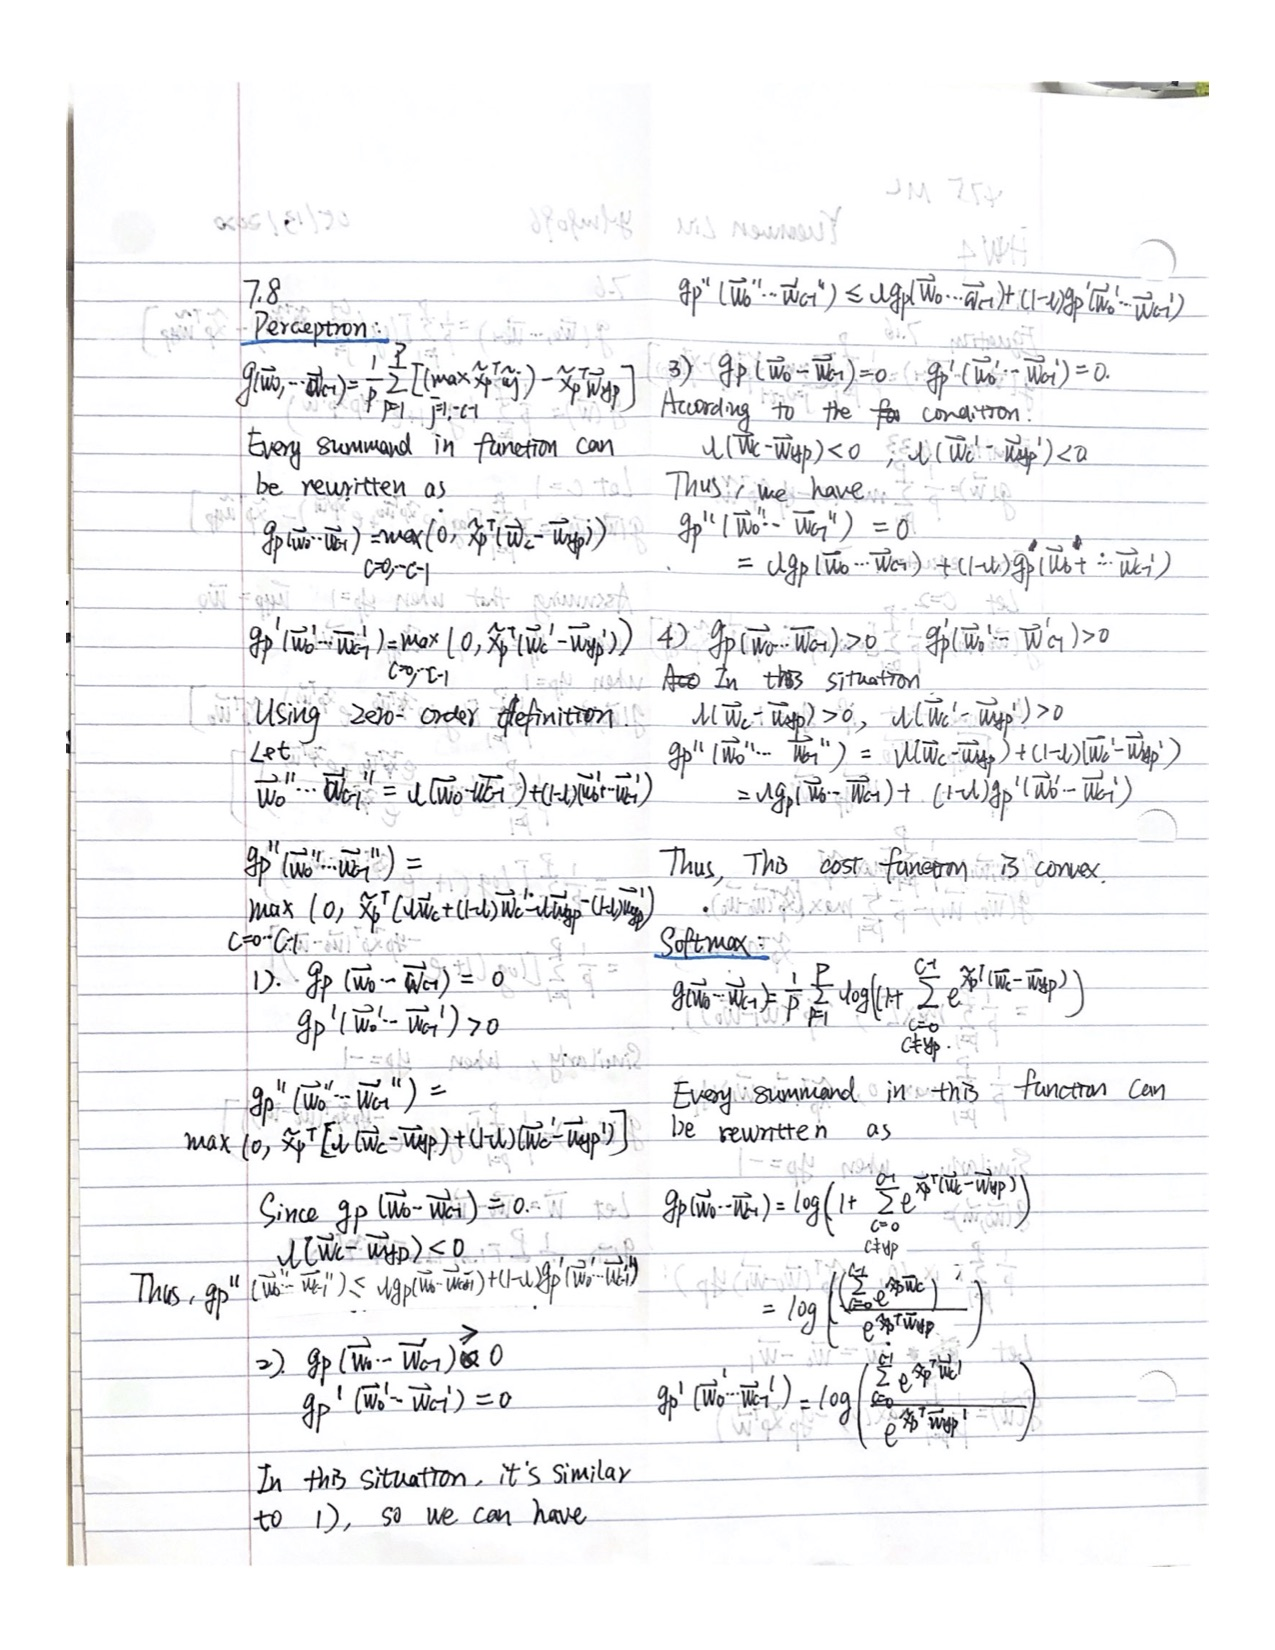

In [23]:
display( Image( filename =  '2.jpg' ))

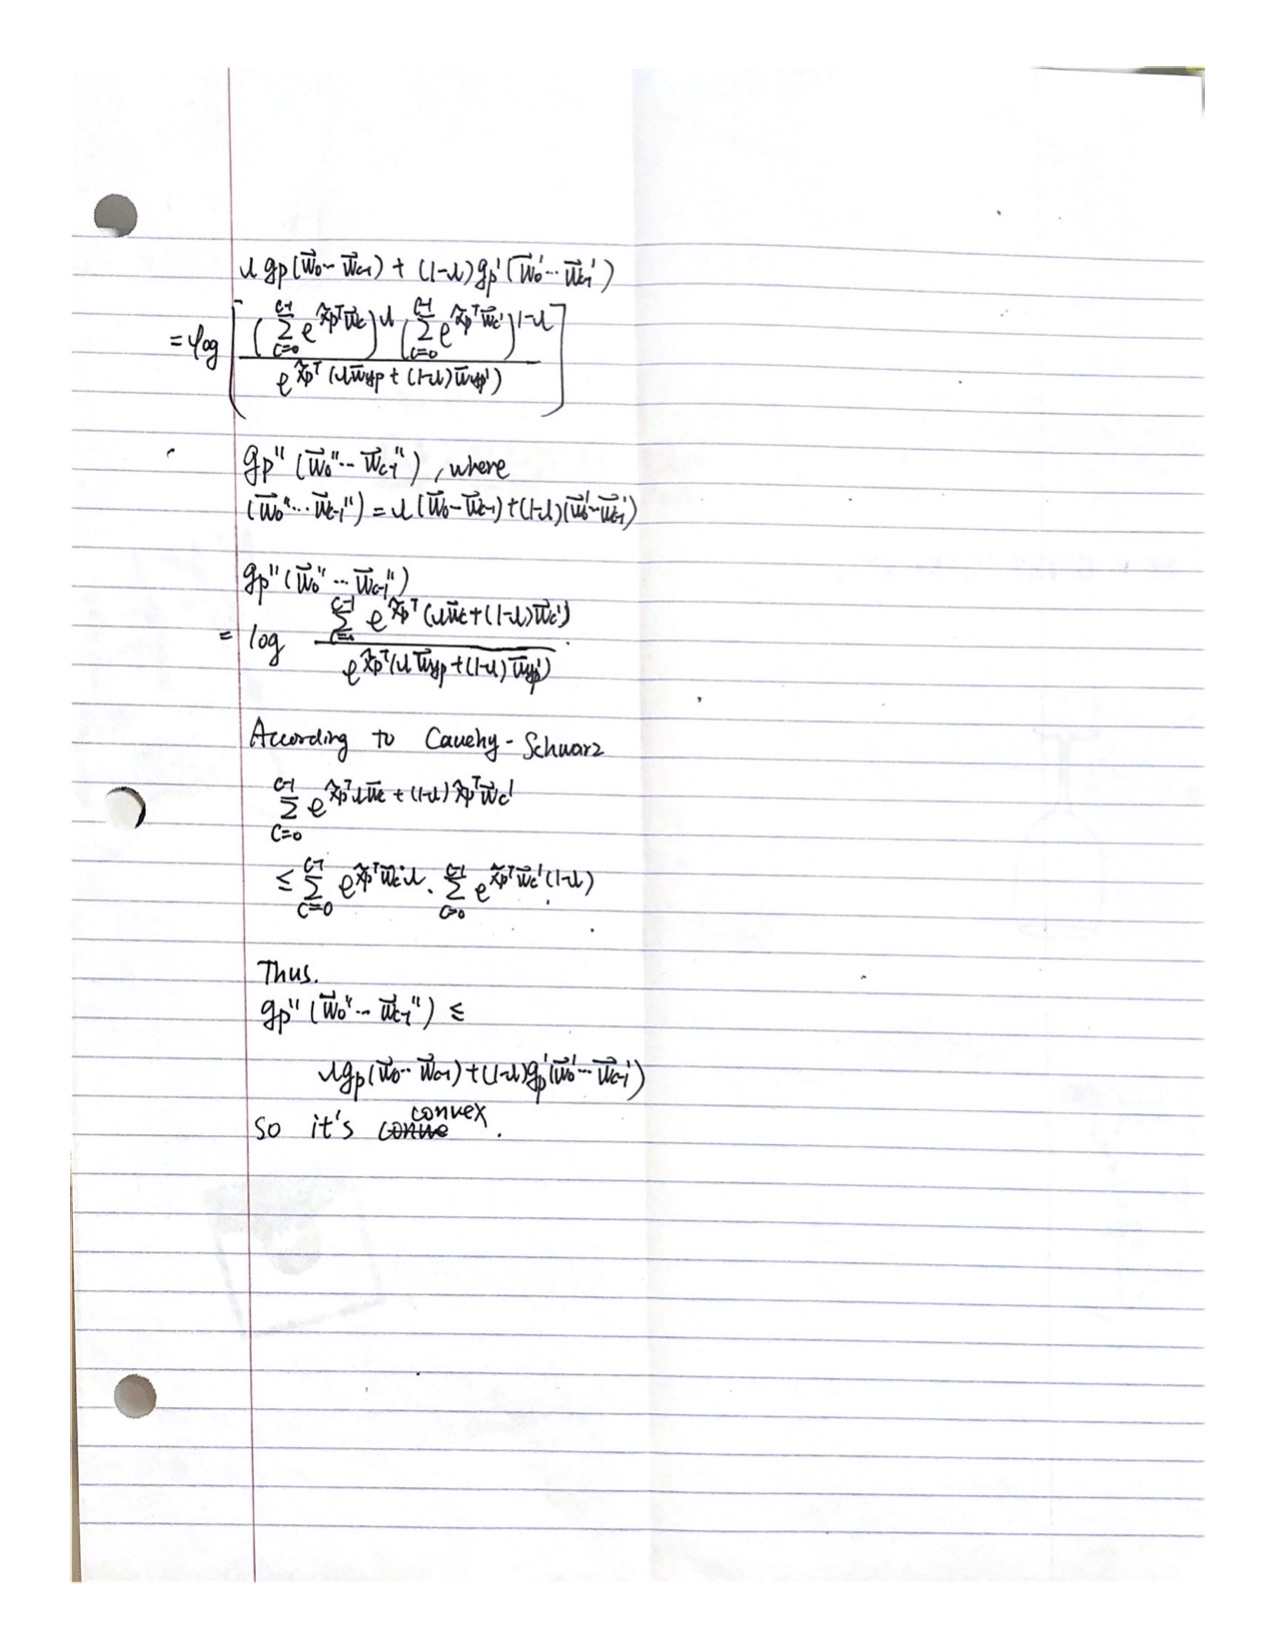

In [24]:
display( Image( filename =  '3.jpg' ))

# 9.2

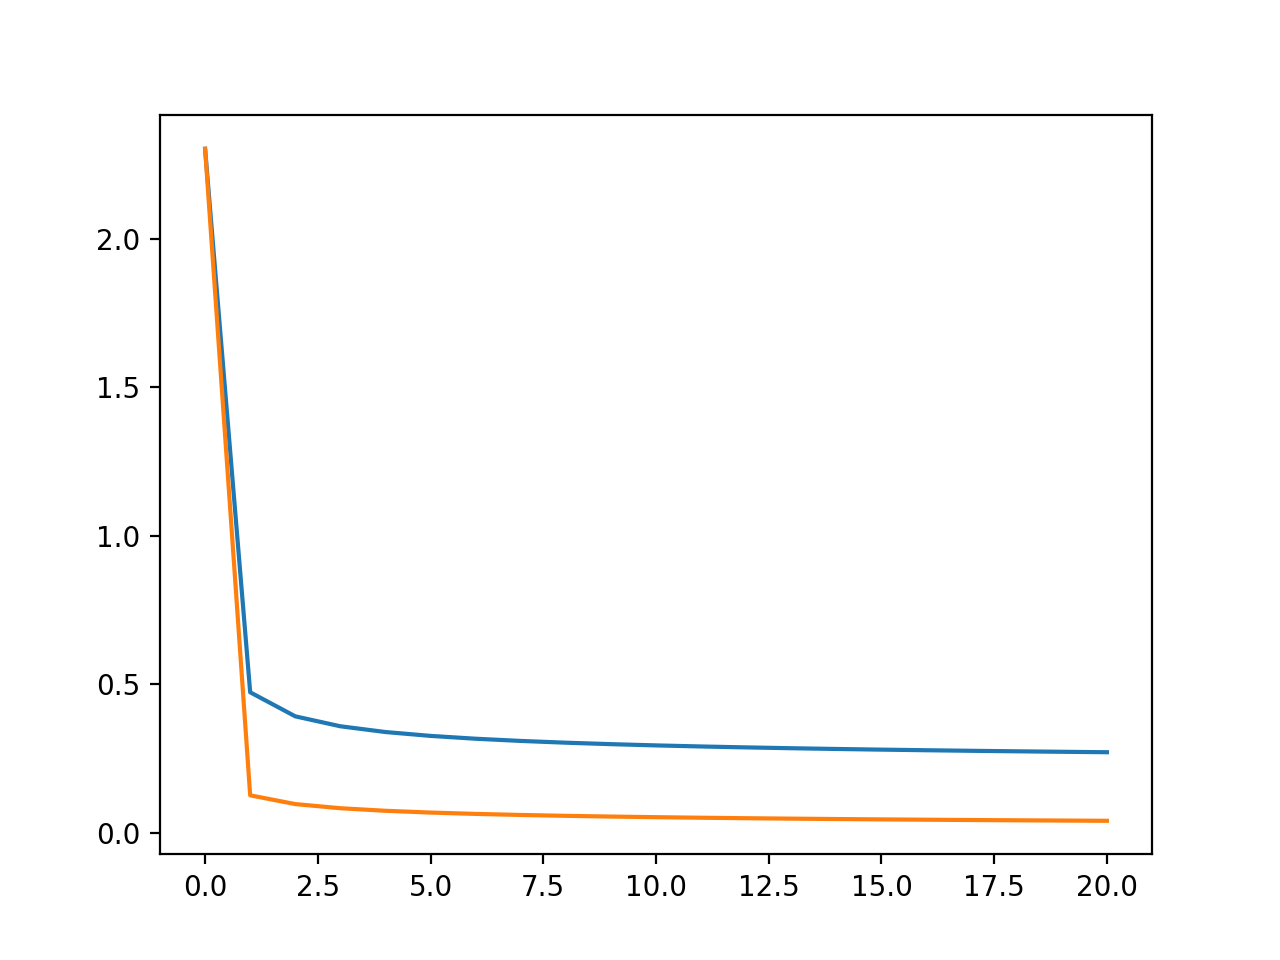

In [26]:
display( Image( filename =  '9.2 costfunc.png' ))

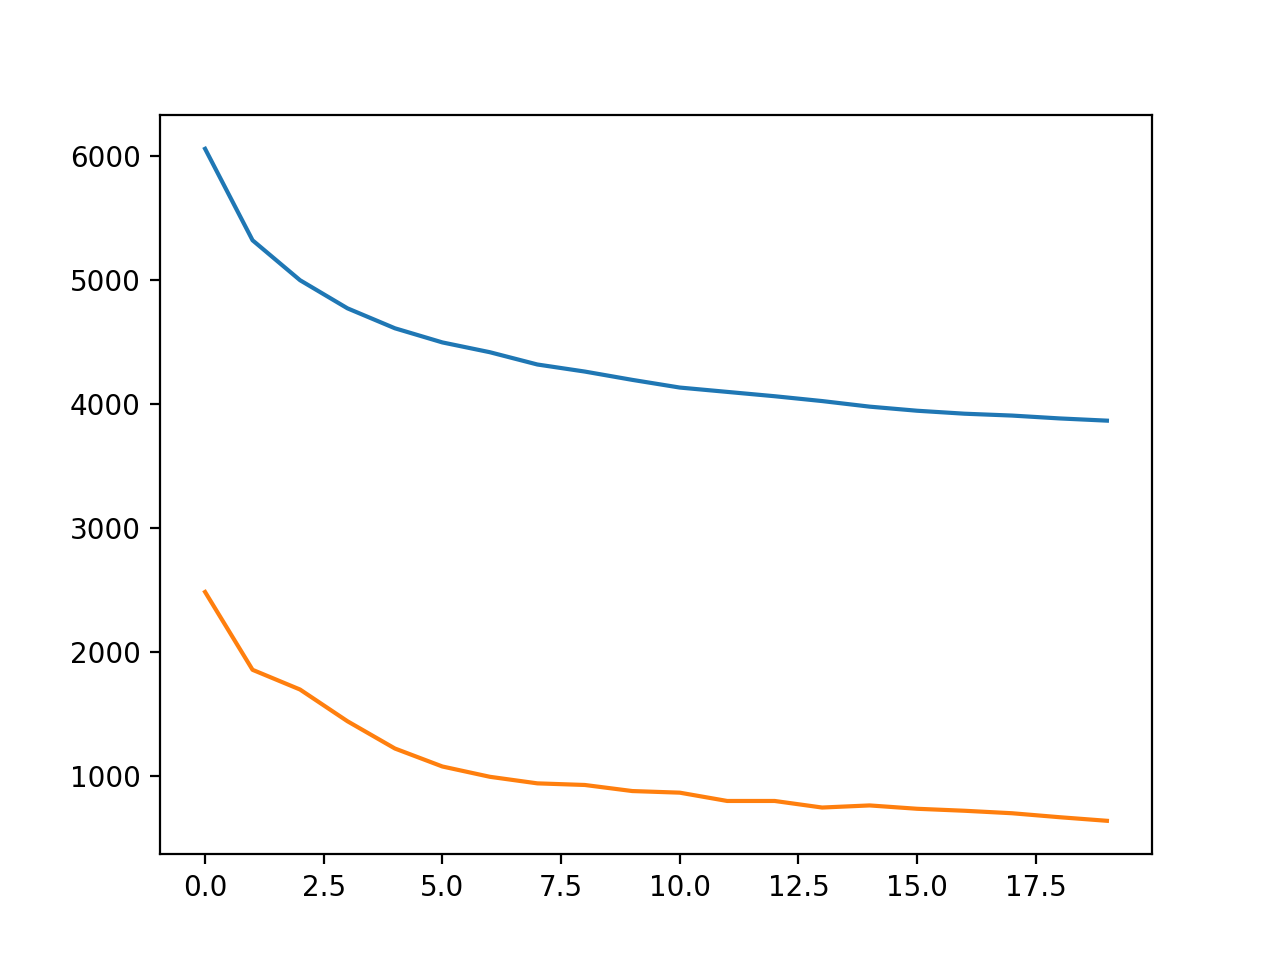

In [27]:
display( Image( filename =  '9.2 miss classification.png' ))

The blue line represents raw data, and the orange one represents data after edge-feature extracted.

In [ ]:
# %load 9.2.py
import ssl
from sklearn.datasets import fetch_openml
import autograd.numpy as np
from autograd import grad
from autograd.misc.flatten import flatten_func
import matplotlib.pyplot as plt
import random

# import MNIST
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# re-shape input/output data
x = x.T
y = np.array([int(v) for v in y])[np.newaxis,:]

for i in range(len(x)):
    if np.average(x[i]) == 0.0:
        continue
    x[i] = (x[i] - np.mean(x[i])) / np.std(x[i])

num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x = x[:,inds]
y = y[:,inds]

lam=0.00001
print(np.shape(x))
print(np.shape(y))
x_1=x
y_1=y

import data_transformer
x_sample_edgebased_features = data_transformer.edge_transformer(x)
x_2=x_sample_edgebased_features
print('shape of transformed input ', x_sample_edgebased_features.shape)

def model(x,w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def multiclass_softmax(w):
    all_evals = model(x, w)
    a = np.log(np.sum(np.exp(all_evals), axis=0))
    b = all_evals[y.astype(int).flatten(), np.arange(np.size(y))]
    cost = np.sum(a - b)
    cost = cost + lam * np.linalg.norm(w[1:, :], 'fro') ** 2
    return cost / float(np.size(y))

def gradientDescent(w, mp_flat):
    gradient = grad(mp_flat)
    grad_eval = gradient(w)
    return w - 0.01 * grad_eval


#w = 0.1*np.ones([x.shape[0] + 1, 10])
#ms_flat, unflatten_func, w = flatten_func(multiclass_softmax, w)
def training(x_1):

    w = 0.01 * np.ones([x_1.shape[0] + 1, 10])
    ms_flat, unflatten_func, w = flatten_func(multiclass_softmax, w)
    xList = [0]
    yList = [ms_flat(w)]
    for epoch in range(20):
        for i in range(250):
            x = x_1[:, i*200:i*200 + 200]
            y = y_1[:, i*200:i*200 + 200]
            w = gradientDescent(w, ms_flat)
        xList.append(epoch + 1)
        yList.append(ms_flat(w))
    plt.plot(xList, yList)

#training(x_1)
w = 0.01 * np.ones([x_1.shape[0] + 1, 10])
ms_flat, unflatten_func, w = flatten_func(multiclass_softmax, w)
xList = [0]
yList = [ms_flat(w)]
wrong_for_raw=[]
wrong_for_edge=[]
y_temp = y_1.astype(int)
for epoch in range(20):
    for i in range(250):
        x = x_1[:, i*200:i*200 + 200]
        y = y_1[:, i*200:i*200 + 200]
        w = gradientDescent(w, ms_flat)
    #print(x_1.shape)
    #print(w.shape)
    w_temp=w.reshape([x_1.shape[0] + 1, 10])
    yPre=np.argmax(model(x_1,w_temp),axis=0)
    wrong=0
    for i in range(np.size(yPre)):
        if yPre[i]!=y_temp[0,i]:
            wrong=wrong+1
    wrong_for_raw.append(wrong)
    xList.append(epoch + 1)
    yList.append(ms_flat(w))
plt.plot(xList, yList,label="raw data point")

print("Succuss!")
x=x_2
y=y_1
#training(x_2)
w = 0.01 * np.ones([x_2.shape[0] + 1, 10])
ms_flat, unflatten_func, w = flatten_func(multiclass_softmax, w)
xList = [0]
yList = [ms_flat(w)]

for epoch in range(20):
    for i in range(250):
        x = x_2[:, i * 200:i * 200 + 200]
        y = y_1[:, i * 200:i * 200 + 200]
        w = gradientDescent(w, ms_flat)
    w_temp = w.reshape([x_2.shape[0] + 1, 10])
    yPre=np.argmax(model(x_2,w_temp),axis=0)
    wrong=0

    for i in range(np.size(yPre)):
        if yPre[i]!=y_temp[0,i]:
            wrong=wrong+1
    wrong_for_edge.append(wrong)
    xList.append(epoch + 1)
    yList.append(ms_flat(w))
plt.plot(xList, yList,label='edge-based')

print("Finish!")

plt.show()
plt.close()

epoch=np.arange(20)
plt.plot(epoch,wrong_for_raw,label='missclassification of raw data')
plt.plot(epoch,wrong_for_edge,label='missclassification of edge-based')

plt.show()
plt.close()